In [1]:
# Importing the header files
import pandas as pd
import graphlab
from IPython.display import Image

In [2]:
# Reading users file
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep = '|', names = u_cols, encoding='latin-1')

In [3]:
# Reading ratings file
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep = '\t', names = r_cols, encoding='latin-1')

In [4]:
# Reading items file
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('ml-100k/u.item', sep = '|', names = i_cols, encoding='latin-1')

In [5]:
print("Number of users:", users.shape)
users.head()

('Number of users:', (943, 5))


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
print("Number of ratings:", ratings.shape)
ratings.head()

('Number of ratings:', (100000, 4))


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
print("Number of items:", items.shape)
items.head()

('Number of items:', (1682, 24))


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# Splitting dataset into training set and test set
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_base = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')
ratings_base.shape, ratings_test.shape

((90570, 4), (9430, 4))

In [9]:
train_data = graphlab.SFrame(ratings_base)
test_data = graphlab.SFrame(ratings_test)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\MYPC~1\AppData\Local\Temp\graphlab_server_1544856603.log.0


This non-commercial license of GraphLab Create for academic use is assigned to shreayan_sameer@srmuniv.edu.in and will expire on December 13, 2019.


In [10]:
# Simple Popularity Model (recommendations based on popular choices)
popularity_model = graphlab.popularity_recommender.create(train_data, user_id = 'user_id', item_id = 'movie_id', target = 'rating')

Recsys training: model = popularity

Warning: Ignoring columns unix_timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 90570 observations with 943 users and 1680 items.

Data prepared in: 0.132183s

90570 observations to process; with 1680 unique items.

In [11]:
# Get recommendations for the first 5 users and display them
popularity_recommend = popularity_model.recommend(users = range(1,6),k = 5)
popularity_recommend.print_rows(num_rows = 25)

+---------+----------+-------+------+
| user_id | movie_id | score | rank |
+---------+----------+-------+------+
|    1    |   1467   |  5.0  |  1   |
|    1    |   1201   |  5.0  |  2   |
|    1    |   1189   |  5.0  |  3   |
|    1    |   1122   |  5.0  |  4   |
|    1    |   814    |  5.0  |  5   |
|    2    |   1467   |  5.0  |  1   |
|    2    |   1201   |  5.0  |  2   |
|    2    |   1189   |  5.0  |  3   |
|    2    |   1122   |  5.0  |  4   |
|    2    |   814    |  5.0  |  5   |
|    3    |   1467   |  5.0  |  1   |
|    3    |   1201   |  5.0  |  2   |
|    3    |   1189   |  5.0  |  3   |
|    3    |   1122   |  5.0  |  4   |
|    3    |   814    |  5.0  |  5   |
|    4    |   1467   |  5.0  |  1   |
|    4    |   1201   |  5.0  |  2   |
|    4    |   1189   |  5.0  |  3   |
|    4    |   1122   |  5.0  |  4   |
|    4    |   814    |  5.0  |  5   |
|    5    |   1467   |  5.0  |  1   |
|    5    |   1201   |  5.0  |  2   |
|    5    |   1189   |  5.0  |  3   |
|    5    | 

In [12]:
# Collaborative Filtering Model
item_sim_model = graphlab.item_similarity_recommender.create(train_data, user_id  ='user_id', item_id = 'movie_id', target = 'rating', similarity_type = 'pearson')

# Make recommendations
item_sim_recomm = item_sim_model.recommend(users = range(1,6), k = 5)
item_sim_recomm.print_rows(num_rows = 25)

Recsys training: model = item_similarity

Warning: Ignoring columns unix_timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 90570 observations with 943 users and 1680 items.

Data prepared in: 0.130034s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 11.725ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 38.72ms                             | 0.25             | 6               |

| 491.648ms                           | 100              | 1680            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.50301s

+---------+----------+-------+------+
| user_id | movie_id | score | rank |
+---------+----------+-------+------+
|    1    |   1599   |  5.0  |  1   |
|    1    |   1201   |  5.0  |  2   |
|    1    |   1189   |  5.0  |  3   |
|    1    |   1122   |  5.0  |  4   |
|    1    |   814    |  5.0  |  5   |
|    2    |   1599   |  5.0  |  1   |
|    2    |   1201   |  5.0  |  2   |
|    2    |   1189   |  5.0  |  3   |
|    2    |   1122   |  5.0  |  4   |
|    2    |   814    |  5.0  |  5   |
|    3    |   1599   |  5.0  |  1   |
|    3    |   1201   |  5.0  |  2   |
|    3    |   1189   |  5.0  |  3   |
|    3    |   1122   |  5.0  |  4   |
|    3    |   814    |  5.0  |  5   |
|    4    |   1599   |  5.0  |  1   |
|    4    |   1201   |  5.0  |  2   |
|    4    |   1189   |  5.0  |  3   |
|    4    |   1122   |  5.0  |  4   |
|    4    |   814    |  5.0  |  5   |
|    5    |   1599   |  5.0  |  1   |
|    5    |   1201   |  5.0  |  2   |
|    5    |   1189   |  5.0  |  3   |
|    5    | 

In [13]:
# Calculating Accuracy of Predictions
model_performance = graphlab.compare(test_data, [popularity_model, item_sim_model])
graphlab.show_comparison(model_performance,[popularity_model, item_sim_model])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |        0.0        |        0.0        |
|   2    |        0.0        |        0.0        |
|   3    | 0.000353481795688 | 0.000106044538706 |
|   4    | 0.000265111346766 | 0.000106044538706 |
|   5    | 0.000212089077413 | 0.000106044538706 |
|   6    | 0.000176740897844 | 0.000106044538706 |
|   7    | 0.000151492198152 | 0.000106044538706 |
|   8    | 0.000265111346766 | 0.000212089077413 |
|   9    | 0.000235654530458 | 0.000212089077413 |
|   10   | 0.000212089077413 | 0.000212089077413 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--

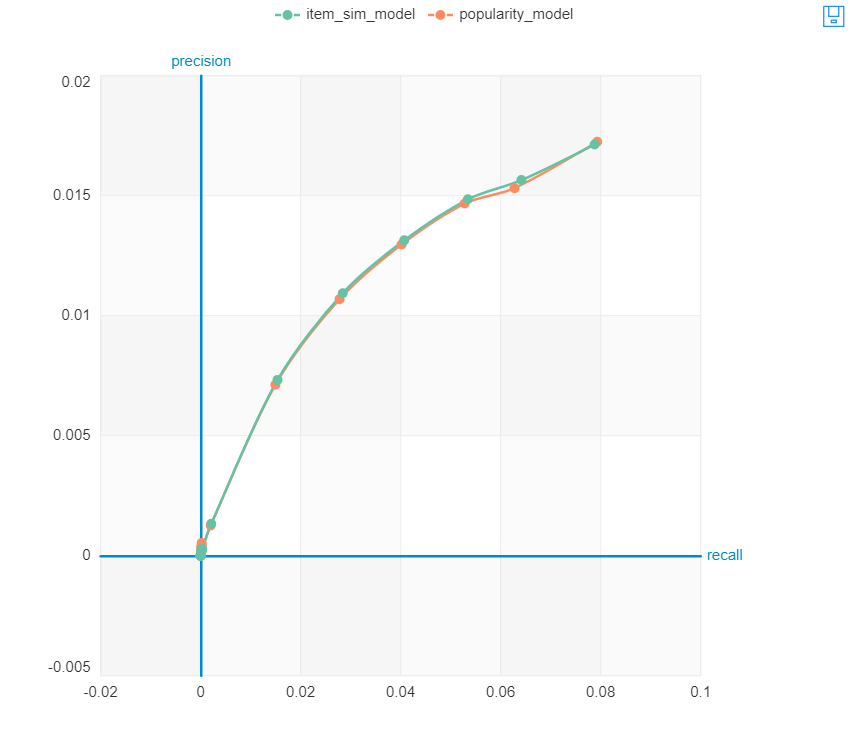

In [14]:
Image("line_recall_precision.png")